## Portfolio Project
### Rohingya Outreach Summary Statistics with SQL

This project was part of the Coursera - University of Michigan - Python for Everybody Specialization certificate<br>
Capstone: Retrieving, Processing, and Visualizing Data with Python (class 5 of 5)<br>
https://www.py4e.com/

### Project Goal: Visualize simple summary stastics from the main dataset of humanitarian operational activities in the Rohingya refugee camps in Cox's Bazaar, Bangladesh

Data Source: https://data.humdata.org/dataset/iscg-4w-influx-cox-s-bazar-bangladesh<br>
Data date:   Data from August 2020 with code R56 in the file name<br>
Skills:      Pandas, Numpy, SQLite, Matplotlib

In [102]:
import pandas as pd

fourw = pd.read_excel(
    '200731_iscg_4w_consolidated_r56_v2_web_clean.xlsx', 
    sheet_name='4W', index_col = 0,
    header=0)
fourw.head(6)

,project_title_ip,jrp_project_code,programme_partner,implementing_partner,donor,sector,activities,activity_details,indicator,relevant_emergency,...,client_total_boys,client_total_women,client_total_men,client_total_elderlywomen,client_total_elderlymen,notes,division_code,district_code,upazila_code,union_code
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,Caritas,Caritas,Jesuit Refugee Service,Child Protection,Alternative care,Identification of children in alternative care...,# of identified girls and boys in alternative ...,JRP Response,...,3.0,0.0,0.0,0.0,0.0,NaN,20,2022.0,NaN,NaN
2,NaN,NaN,Caritas,Caritas,Jesuit Refugee Service,Child Protection,Case Management,Support children at risk and survivors includi...,# of identified girls and boys at risk who rec...,JRP Response,...,3.0,0.0,0.0,0.0,0.0,NaN,20,2022.0,202294.0,20229479.0
3,NaN,NaN,Caritas,Caritas,Jesuit Refugee Service,Child Protection,CP Community Engagement,Awareness raising,"# of girls, boys, women and men reached by pre...",COVID-19 Response,...,412.0,513.0,618.0,0.0,0.0,NaN,20,2022.0,202294.0,20229479.0
4,NaN,NaN,Caritas,Caritas,Jesuit Refugee Service,Child Protection,Alternative care,Identification of children in alternative care...,# of identified girls and boys in alternative ...,JRP Response,...,3.0,0.0,0.0,0.0,0.0,NaN,20,2022.0,202294.0,20229479.0
5,NaN,NaN,Caritas,Caritas,Jesuit Refugee Service,Child Protection,Case Management,Support children at risk and survivors includi...,# of identified girls and boys at risk who rec...,JRP Response,...,2.0,0.0,0.0,0.0,0.0,NaN,20,2022.0,202294.0,20229479.0
6,NaN,NaN,Caritas,Caritas,Jesuit Refugee Service,Child Protection,CP Community Engagement,Awareness raising,"# of girls, boys, women and men reached by pre...",COVID-19 Response,...,210.0,285.0,307.0,0.0,0.0,NaN,20,2022.0,202294.0,20229479.0


In [103]:
fourw.dtypes

project_title_ip                      object
jrp_project_code                      object
programme_partner                     object
implementing_partner                  object
donor                                 object
sector                                object
activities                            object
activity_details                      object
indicator                             object
relevant_emergency                    object
measuring_units                       object
quantity_planned                      object
quantity_achieved                     object
activity_status                       object
division                              object
district                              object
upazila                               object
union_area                            object
ward                                  object
camp_village_location_name            object
reporting_month_date                  object
start_date_of_program         datetime64[ns]
end_date_o

In [104]:
fourw.isna().any()

project_title_ip               True
jrp_project_code               True
programme_partner              True
implementing_partner           True
donor                          True
sector                        False
activities                     True
activity_details              False
indicator                      True
relevant_emergency             True
measuring_units                True
quantity_planned               True
quantity_achieved              True
activity_status                True
division                      False
district                       True
upazila                        True
union_area                     True
ward                           True
camp_village_location_name     True
reporting_month_date           True
start_date_of_program          True
end_date_of_program            True
client_type                    True
client_total_families          True
client_total_individuals       True
client_total_female            True
client_total_male           

In [101]:
import sqlite3

conn = sqlite3.connect('fourw.sqlite')
cur = conn.cursor()
cur.executescript('''
DROP TABLE IF EXISTS fourwtable;
CREATE TABLE fourwtable (
    id INTEGER NOT NULL PRIMARY KEY,
    project_title_ip TEXT,
    jrp_project_code TEXT,
    programme_partner TEXT,
    implementing_partner TEXT,
    donor TEXT,
    sector TEXT,
    activities TEXT,
    activity_details TEXT,
    indicator TEXT,
    relevant_emergency TEXT,
    measuring_units TEXT,
    quantity_planned REAL,
    quantity_achieved REAL,
    activity_status TEXT,
    division TEXT,
    district TEXT,
    upazila TEXT,
    union_area TEXT,
    ward TEXT,
    camp_village_location_name TEXT,
    reporting_month_date TEXT,
    start_date_of_program TEXT,
    end_date_of_program TEXT,
    client_type TEXT,
    client_total_families REAL,
    client_total_individuals REAL,
    client_total_female REAL,
    client_total_male REAL,
    client_total_girls REAL,
    client_total_boys REAL,
    client_total_women REAL,
    client_total_men REAL,
    client_total_elderlywomen REAL,
    client_total_elderlymen REAL,
    notes TEXT,
    division_code INTEGER,
    district_code INTEGER,
    upazila_code INTEGER,
    union_code INTEGER
);
''')


In [105]:
from pandas import DataFrame
db_conn = sqlite3.connect('fourw.sqlite')
fourw.to_sql('fourwtable', db_conn, if_exists='append', index=False)

In [107]:
import pandas as pd
import sqlite3

db_conn = sqlite3.connect('fourw.sqlite')
df = pd.read_sql_query('SELECT * FROM fourwtable', db_conn)
print(df.head())

   id project_title_ip jrp_project_code programme_partner  \
0   1             None             None           Caritas   
1   2             None             None           Caritas   
2   3             None             None           Caritas   
3   4             None             None           Caritas   
4   5             None             None           Caritas   

  implementing_partner                   donor            sector  \
0              Caritas  Jesuit Refugee Service  Child Protection   
1              Caritas  Jesuit Refugee Service  Child Protection   
2              Caritas  Jesuit Refugee Service  Child Protection   
3              Caritas  Jesuit Refugee Service  Child Protection   
4              Caritas  Jesuit Refugee Service  Child Protection   

                activities                                   activity_details  \
0        Alternative care   Identification of children in alternative care...   
1          Case Management  Support children at risk and survi

In [110]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,id,project_title_ip,jrp_project_code,programme_partner,implementing_partner,donor,sector,activities,activity_details,indicator,relevant_emergency,measuring_units,quantity_planned,quantity_achieved,activity_status,division,district,upazila,union_area,ward,camp_village_location_name,reporting_month_date,start_date_of_program,end_date_of_program,client_type,client_total_families,client_total_individuals,client_total_female,client_total_male,client_total_girls,client_total_boys,client_total_women,client_total_men,client_total_elderlywomen,client_total_elderlymen,notes,division_code,district_code,upazila_code,union_code
count,17222.000000,1224,768,16766,16262,13232,17222,17128,17222,6217,5838,7234,1584.0,4750.0,17106,17222,17215,17215,17185,16720,16533,7491,6714,7601,14974,2505.000000,1.582200e+04,12675.0,11100.000000,7546.000000,7546.000000,3833.000000,3833.000000,3749.000000,3749.000000,1120,17222.0,17215.000000,17205.000000,1.717100e+04
unique,NaN,85,37,108,106,392,12,85,325,95,6,85,505.0,1204.0,5,1,2,10,33,74,164,14,188,131,6,NaN,NaN,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331,NaN,NaN,NaN,NaN
top,NaN,IOM Primary health care,COX-JRP-2019-HEALTH-1559640570,UNICEF,BRAC,UNHCR,Education,Community Engagement,Awareness raising/sensitization session (block...,Awareness raising/sensitization session (block...,COVID-19 Response,Awareness,0.0,1.0,Ongoing,Chittagong,Cox's Bazar,Ukhia,Palong Khali,Kutupalong Expansion Site,Camp 4,1 July- 31 July 2020,2020-07-01 00:00:00,2020-12-31 00:00:00,Refugee,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Session Neighbour group,NaN,NaN,NaN,NaN
freq,NaN,120,120,5796,2647,3512,5456,2304,1077,1077,3207,1077,123.0,651.0,10521,17222,17182,13296,12556,10683,789,2213,2117,2531,12755,NaN,NaN,4229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,NaN
mean,8611.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1051.153852,2.147808e+03,NaN,472.366712,173.265938,178.169880,238.220727,206.082975,17.926991,24.557598,NaN,20.0,2021.963578,202289.056263,2.022898e+07
std,4971.707503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3025.658189,5.950751e+04,NaN,3002.838165,922.434572,948.707482,1172.684027,1124.973471,102.741008,145.936005,NaN,0.0,0.831099,84.140301,8.422343e+03
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,20.0,2003.000000,200373.000000,2.003736e+07
25%,4306.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,20.0,2022.000000,202294.000000,2.022945e+07
50%,8611.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.000000,2.900000e+01,NaN,15.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,NaN,20.0,2022.000000,202294.000000,2.022948e+07
75%,12916.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799.000000,1.930000e+02,NaN,106.000000,90.000000,93.000000,20.000000,14.000000,0.000000,0.000000,NaN,20.0,2022.000000,202294.000000,2.022948e+07


In [112]:
pd.set_option('display.max_columns', None)
df.describe(include='all').to_csv("pandas_describe.csv")

In [137]:
# The column client_total_female was not initially summing with pandas sum function...
# so the column had to be coerced to numeric though it was supposed to be REAL data ...
# when the sqlite database was created.
df = df.assign(client_total_female=pd.to_numeric(df['client_total_female'], 
                                                 errors='coerce'))

# Line 7 used to display sums as whole numbers and suppress pandas displaying...
# in scientific notation.
pd.options.display.float_format = '{:.0f}'.format

df.sum(skipna=True, numeric_only=True)

id                             148307253
client_total_families            2633140
client_total_individuals        33982620
client_total_female              5347202
client_total_male                5243271
client_total_girls               1307465
client_total_boys                1344470
client_total_women                913100
client_total_men                  789916
client_total_elderlywomen          67208
client_total_elderlymen            92066
division_code                     344440
district_code                   34808103
upazila_code                  3480383213
union_code                  347351780709
dtype: float64

In [ ]:
# the code in this cell would not run
# couldn't solve it so reverted to doing analysis by querying sqlite db

import numpy
from matplotlib import pyplot

female = df.sum('client_total_female')
male = df.sum('client_total_male')
girls = df.sum('client_total_girls')
boys = df.sum('client_total_boys')
women = df.sum('client_total_women')
men = df.sum('client_total_men')
eldf = df.sum('client_total_elderlywomen')
eldm = df.sum('client_total_elderlymen')

pyplot.hist([female, male], bins, alpha=0.5, label=['client_total_female', 'client_total_male'])


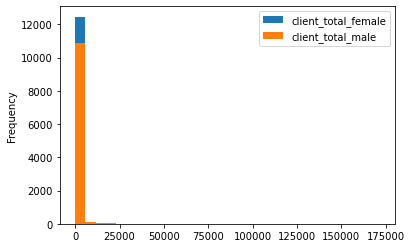

In [141]:
df[["client_total_female", "client_total_male"]].plot(bins=30, kind="hist")

In [168]:
import sqlite3

conn = sqlite3.connect('fourw.sqlite')
c = conn.cursor()

c.execute('SELECT sum(client_total_individuals) FROM fourwtable')
total = int(c.fetchone()[0])
print('Total Individuals:', total)

c.execute('SELECT sum(client_total_female) FROM fourwtable')
female = int(c.fetchone()[0])
print('Total Females:', female)

c.execute('SELECT sum(client_total_male) FROM fourwtable')
male = int(c.fetchone()[0])
print('Total Males:', male)

c.execute('SELECT sum(client_total_girls) FROM fourwtable')
girls = int(c.fetchone()[0])
print('Total Girls:', girls)

c.execute('SELECT sum(client_total_boys) FROM fourwtable')
boys = int(c.fetchone()[0])
print('Total Boys:', boys)

c.execute('SELECT sum(client_total_women) FROM fourwtable')
women = int(c.fetchone()[0])
print('Total Women:', women)

c.execute('SELECT sum(client_total_men) FROM fourwtable')
men = int(c.fetchone()[0])
print('Total Men:', men)

c.execute('SELECT sum(client_total_elderlywomen) FROM fourwtable')
elderlywomen = int(c.fetchone()[0])
print('Total Elderly Women:', elderlywomen)

c.execute('SELECT sum(client_total_elderlymen) FROM fourwtable')
elderlymen = int(c.fetchone()[0])
print('Total Elderly Men:', elderlymen)

conn.close()

Total Individuals: 33982620
Total Females: 5347201
Total Males: 5243270
Total Girls: 1307464
Total Boys: 1344469
Total Women: 913100
Total Men: 789916
Total Elderly Women: 67208
Total Elderly Men: 92066


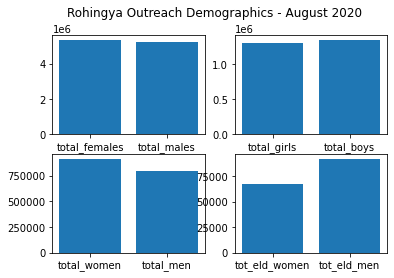

In [189]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.bar(['total_females', 'total_males'], [female, male])
ax1.bar(['total_girls', 'total_boys'], [girls, boys])
ax2.bar(['total_women', 'total_men'], [women, men])
ax3.bar(['tot_eld_women', 'tot_eld_men'], [elderlywomen, elderlymen])
plt.suptitle('Rohingya Outreach Demographics - August 2020')

plt.show()

In [196]:
import sqlite3

conn = sqlite3.connect('fourw.sqlite')
c = conn.cursor()

# Generate a sum of individuals by client types
c.execute('SELECT client_type, sum(client_total_individuals) FROM fourwtable GROUP BY client_type')
client_types = c.fetchall()
print('Client Types:', client_types)

conn.close()

Client Types: [(None, 21847823.0), ('Community Leaders', 3.0), ('Government Officials', 11.0), ('Host Community', 802473.5), ('Host Community & Refugee', 7500.0), ('Humanitarian Workers', 1679.0), ('Refugee', 11323130.5)]


In [197]:
import sqlite3

conn = sqlite3.connect('fourw.sqlite')
c = conn.cursor()

# Generate a sum of individuals by relevant emergency categories
c.execute('SELECT relevant_emergency, sum(client_total_individuals) FROM fourwtable GROUP BY relevant_emergency')
emergency = c.fetchall()
print('Client Types:', emergency)

conn.close()

Client Types: [(None, 29937579.0), ('COVID-19', 1427117.0), ('COVID-19 Response', 1156340.5), ('COVID-19 and JRP Response', 170678.0), ('JRP Response', 312944.0), ('Monsoon', 72486.0), ('Regular Programme', 905475.5)]
